# Importing the dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Analysis

In [8]:
# importing the dataset to pandas data frame
diabetics_dataset = pd.read_csv(r"D:\My Research\Diabetics Prediction\diabetes dataset.csv")

In [10]:
diabetics_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# Number of rows and columns in the dataframe
diabetics_dataset.shape

(768, 9)

In [15]:
# getting the statistical measures of the data
diabetics_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
diabetics_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
# 0 ---- Non-diabetics
# 1 ---- Diabetics

In [21]:
diabetics_dataset.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [23]:
# Separating the data and the labels
X = diabetics_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetics_dataset['Outcome']

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Data Standardizaton

In [35]:
scaler = StandardScaler()

In [39]:
scaler.fit(X)

StandardScaler()

In [49]:
standardized_data = scaler.transform(X)

In [51]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [53]:
X = standardized_data
Y = diabetics_dataset['Outcome']

In [55]:
# train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [57]:
print(X_train.shape, X.shape, X_test.shape)

(614, 8) (768, 8) (154, 8)


# Training the model 


In [64]:
classifier = svm.SVC(kernel = 'linear')

In [66]:
# Training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model evaluation

In [71]:
# Accuracy score of the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print("Training data accuracy score: ", training_data_accuracy*100, " %")

Training data accuracy score:  78.66449511400651  %


In [87]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [89]:
print("Accuracy_score on test data: ", test_data_accuracy*100, " %")

Accuracy_score on test data:  77.27272727272727  %


# Making a Predictive System

In [130]:
input_data = (13,145,82,19,110,22.2,0.245,57)
# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the input data as we are predicting for one instance
reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
# standadized the input data
std_scaler = scaler.transform(reshaped_input_data)
prediction = classifier.predict(std_scaler)
print(prediction)
if (prediction[0] == "0"):
    print("The preson doesn't have diabetics")
else:
    print("The person has diabetics")

[0]
The person has diabetics


F:\anacondainstall\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


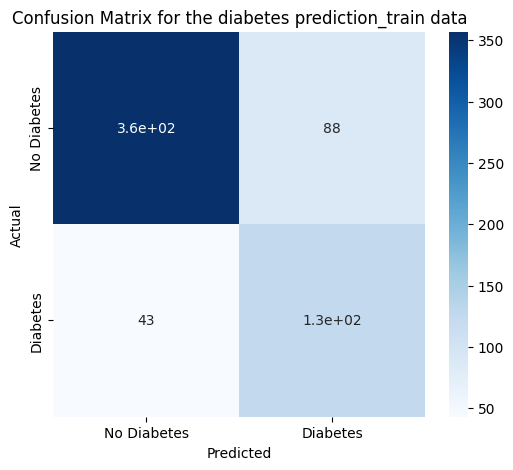

In [160]:
# Visualizing the accuracy of Training dataset
from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(X_train_prediction, Y_train)
plt.figure(figsize = (6,5))
sns.heatmap(cm1, annot = True, cmap = "Blues", xticklabels = ["No Diabetes", "Diabetes"], yticklabels =  ["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for the diabetes prediction_train data")
plt.show()

In [162]:
classification_report_train= classification_report(X_train_prediction, Y_train)
print(classification_report_train)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       445
           1       0.59      0.75      0.66       169

    accuracy                           0.79       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.81      0.79      0.79       614



In [164]:
# Visualizing the accuracy of test data


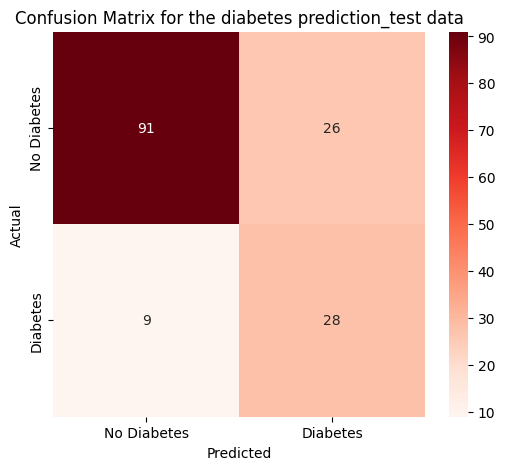

In [168]:
cm2 = confusion_matrix(X_test_prediction, Y_test)
plt.figure(figsize = (6,5))
sns.heatmap(cm2, annot = True, cmap = "Reds", xticklabels = ["No Diabetes", "Diabetes"], yticklabels =  ["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for the diabetes prediction_test data")
plt.show()